# Brownian Motion For A Harmonic Oscillator

We generalize the discussions of the previous chapter to include a quadratic potential term. The SDEs are

$$
\newcommand{\mean}[1]{\langle #1 \rangle}
\newcommand{\f}[2]{\frac{#1}{#2}}
\begin{eqnarray}
dX(t) &=& V(t) dt \\
dV(t) &=& - \left[ \omega^2 X(t)  + \gamma V(t) \right] dt + \beta dW_t
\end{eqnarray}
$$

Following through with the steps of the previous chapter we obtain SDEs for $dV^2(t),dX^2(t)$ and $dXV(t)$ using Ito's rule and take expectation values. On massaging the resultant equations we get the following ODEs for the first moments

$$
\begin{eqnarray}
\f{d \mean{X(t)}}{dt} &=& \mean{V(t)} \\
\f{d \mean{V(t)}}{dt} &=& - \omega^2 \mean{X(t)} - \gamma \mean{V(t)}
\end{eqnarray}
$$

and the following for the second moments

$$ \begin{eqnarray}
\f{d var(X(t))}{dt} &=& 2 cov(X(t),V(t)) \\
\f{d var(V(t))}{dt} &=& \beta^2 - 2 \omega^2 cov(X(t),V(t)) - 2 \gamma var(V(t)) \\
\f{d cov(X(t),V(t))}{dt} &=& var(V(t))-  \gamma cov(X(t),V(t)) - \omega^2 var(X(t))
\end{eqnarray}
$$

As before, since the increments are normally distributed the joint probability distribution of $X(t)$ and $V(t)$ is normal and knowing the first and second moments is sufficient.

These ODEs are readily solved and after imposing initial conditions $X(0)=x_0$ and $V(0)=v_0$ we have

$$
\begin{eqnarray}
\mean{X(t)} &=& e^{-\gamma t/2} \left[ x_0 \cos (\omega' t) + \left( v_0 + \f{\gamma x_0}{2} \right) \f{\sin(\omega 't)}{\omega '} \right] \\
\mean{V(t)} &=& e^{-\gamma t/2} \left[ v_0 \cos (\omega' t) - \left( x_0 \omega^2 + \f{\gamma v_0}{2} \right) \f{\sin(\omega 't)}{\omega '} \right] \\
var(X(t)) &=& \f{\beta^2}{2 \gamma \omega^2} + e^{-\gamma t}\left( \f{\beta^2}{8 \gamma {\omega '}^2 \omega^2}\right) \\
&& \times [-4 \omega^2 + \gamma^2 \cos(\omega' t)-2 \gamma \omega' \sin(2\omega' t)] \\
var(V(t)) &=& \f{\beta^2}{2 \gamma } + e^{-\gamma t}\left( \f{\beta^2}{8 \gamma {\omega '}^2}\right) \\
&& \times [-4 \omega^2 + \gamma^2 \cos(\omega' t)+2 \gamma \omega' \sin(2\omega' t)] \\
Cov(X(t),V(t)) &=& e^{-\gamma t}\left( \f{\beta^2}{4 {\omega '}^2}\right) \left[1- \cos(2 \omega't) \right]
\end{eqnarray}
$$

where $\omega'=\sqrt{\omega^2 - \gamma^2/4}$. Thus we have

$$
V(t) = \mathcal N \Bigg( e^{-\gamma t/2} \left[ v_0 \cos (\omega' t) - \left( x_0 \omega^2 + \f{\gamma v_0}{2} \right) \f{\sin(\omega 't)}{\omega '} \right], \sqrt{\f{\beta^2}{2 \gamma } + e^{-\gamma t}\left( \f{\beta^2}{8 \gamma {\omega '}^2}\right)\left [-4 \omega^2 + \gamma^2 \cos(\omega' t)+2 \gamma \omega' \sin(2\omega' t)\right]} \Bigg)
$$

and

$$
X(t) = \mathcal N \Bigg( e^{-\gamma t/2} \left[ x_0 \cos (\omega' t) + \left( v_0 + \f{\gamma x_0}{2} \right) \f{\sin(\omega 't)}{\omega '} \right],\sqrt{\f{\beta^2}{2 \gamma \omega^2} + e^{-\gamma t}\left( \f{\beta^2}{8 \gamma {\omega '}^2 \omega^2}\right) \left[-4 \omega^2 + \gamma^2 \cos(\omega' t)-2 \gamma \omega' \sin(2\omega' t)\right]}  \Bigg)
$$


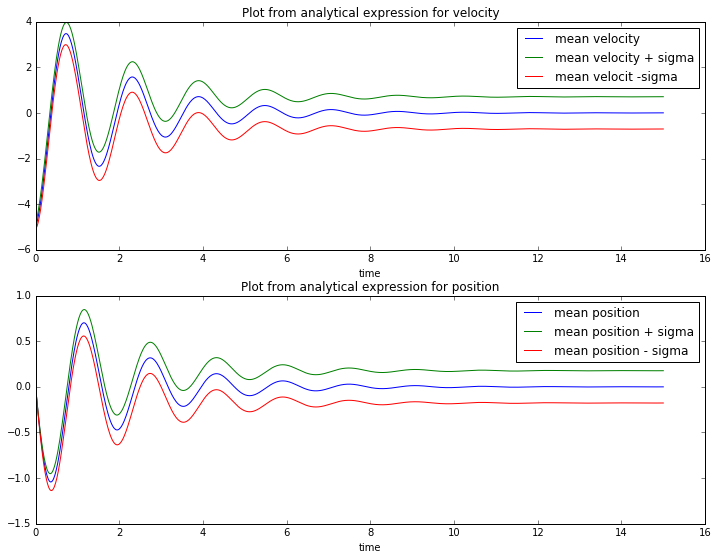

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12, 9)


# Parameters
beta=1.0
gamma=1.0
omega=4.0
omegap=np.sqrt(omega**2 - gamma**2/4.0)

# Initial values
v0=-5.0
x0=0.0

t=np.linspace(0,15,1000)
vmean=np.exp(-gamma*t/2)*( v0 *np.cos(omegap*t) - (x0 * omega**2 + gamma*v0/2.0)*np.sin(omegap *t)/omegap)
std_vel=np.sqrt(beta**2/(2*gamma) + np.exp(-gamma*t)*(beta**2/(8*gamma*omegap**2))*(-4*omega**2 + gamma**2 * np.cos(omegap*t) + 2*gamma*omegap*np.sin(2*omegap*t)))
vup=vmean+std_vel
vdown=vmean-std_vel
plt.subplot(211)
plt.plot(t,vmean,label="mean velocity")
plt.plot(t,vup,label="mean velocity + sigma")
plt.plot(t,vdown,label="mean velocit -sigma")
plt.xlabel("time")
plt.title("Plot from analytical expression for velocity")


plt.legend()



plt.subplot(212)
xmean=np.exp(-gamma*t/2)*( x0 *np.cos(omegap*t) + (v0 + gamma*x0/2.0)*np.sin(omegap *t)/omegap)
std_pos=np.sqrt(beta**2/(2*gamma*omega**2) + np.exp(-gamma*t)*(beta**2/(8*gamma*omegap**2*omega**2))*(-4*omega**2 + gamma**2 * np.cos(omegap*t) - 2*gamma*omegap*np.sin(2*omegap*t)))


xup=xmean+std_pos
xdown=xmean-std_pos
plt.plot(t,xmean,label="mean position")
plt.plot(t,xup,label="mean position + sigma")
plt.plot(t,xdown,label="mean position - sigma")
plt.xlabel("time")
plt.title("Plot from analytical expression for position")


plt.legend()




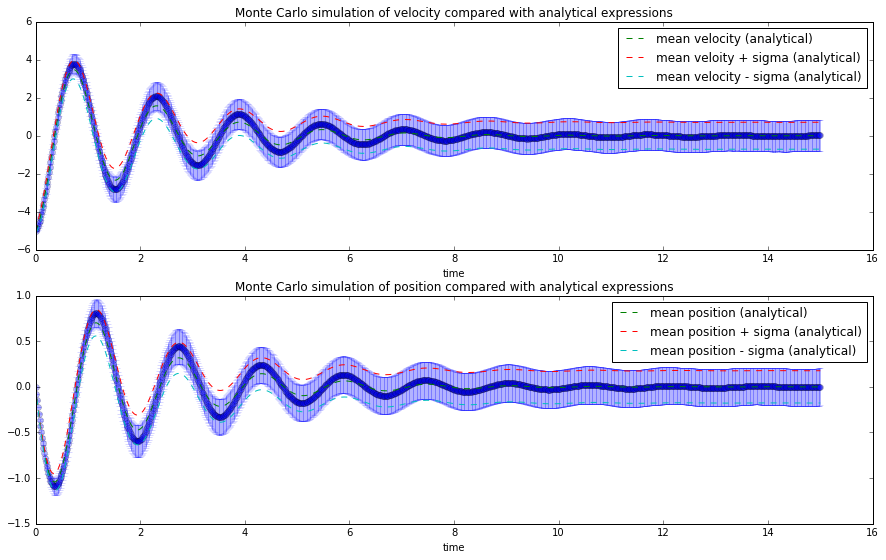

In [19]:
class Paths(object):
    
    def __init__(self,x0,v0,beta,gamma,omega,T,nsteps,npaths):
        self.x0=x0
        self.v0=v0
        self.beta=beta
        self.gamma=gamma
        self.omega=omega
        self.T=T
        self.nsteps=nsteps
        self.npaths=npaths
        self.dt=1.0*T/nsteps
        self.time=np.linspace(0,self.T,self.nsteps)
        self.dW=np.sqrt(self.dt)
        self.randoms=np.random.normal(0,1,npaths*(nsteps-1))
        self.randoms.shape=[npaths,nsteps-1]
        
        
        
        paths_X=np.zeros(shape=(npaths,nsteps))
        paths_V=np.zeros(shape=(npaths,nsteps))
        
        paths_X[:,0]=self.x0
        paths_V[:,0]=self.v0
    
        # the SDE are
        # V_{t+1}=V_t - gamma V_t dt - omega**2 X_t dt+ beta dW
        # X_{t+1}=X_t + V_t dt
        
        for i in range(nsteps-1):
            paths_V[:,i+1]=paths_V[:,i]*(1.0-gamma*self.dt)-self.omega**2*self.dt*paths_X[:,i] +self.beta*self.dW*self.randoms[:,i]
            paths_X[:,i+1]=paths_X[:,i]+paths_V[:,i]*self.dt
        self.paths_V=paths_V
        self.paths_X=paths_X
        
    def get_paths_V(self):
        return self.paths_V
    
    def get_paths_X(self):
        return self.paths_X
    
    def get_timeline(self):
        return self.time
    

paths=Paths(x0,v0,beta,gamma,omega,15,1000,10000)
v_mean=paths.get_paths_V().mean(0)
v_std=paths.get_paths_V().std(0)

x_mean=paths.get_paths_X().mean(0)
x_std=paths.get_paths_X().std(0)

t_paths=paths.get_timeline()

plt.subplot(211)
plt.errorbar(t_paths,v_mean,yerr=v_std,fmt='o',alpha=.3)
plt.plot(t,vmean,"--",label="mean velocity (analytical)")
plt.plot(t,vup,"--",label="mean veloity + sigma (analytical)")
plt.plot(t,vdown,"--",label="mean velocity - sigma (analytical)")
plt.xlabel("time")
plt.title("Monte Carlo simulation of velocity compared with analytical expressions")

plt.legend()

plt.subplot(212)
plt.errorbar(t_paths,x_mean,yerr=x_std,fmt='o',alpha=.3)
plt.plot(t,xmean,"--",label="mean position (analytical)")
plt.plot(t,xup,"--",label="mean position + sigma (analytical)")
plt.plot(t,xdown,"--",label="mean position - sigma (analytical)")
plt.xlabel("time")
plt.title("Monte Carlo simulation of position compared with analytical expressions")


plt.legend()



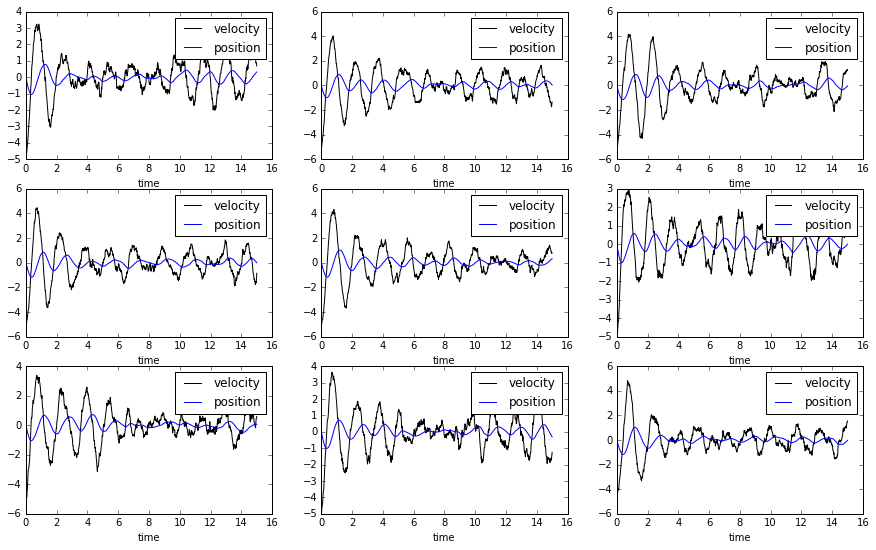

In [17]:
figsize(15,9)
number_columns=3
number_rows=3
for i,j in enumerate([(i/number_columns,i%number_columns) for i in range(number_columns*number_rows)]):
    plt.subplot2grid((number_rows,number_columns),j)
    plt.plot(t_paths,paths.get_paths_V()[i],'k',label="velocity")
    plt.plot(t_paths,paths.get_paths_X()[i],'b',label="position")
    plt.xlabel("time")
    plt.legend()



THIS IS NOT QUITE ACCURATE AS WE ARE USING THE EULER METHOD WHICH EVEN FOR AN UNDAMPED NON STOCHASTIC OSCILLATOR GIVES EVER INCREASING ENERGY. WE NEED TO CORRECT THAT PART USING RUNGE-KUTTA.